# PCA through Singular Value Decomposition

In [9]:
import numpy as np
# Defined 3 points in 2D-space:
X = np.array([[2, 1, 0],[4, 3, 0]])
# Calculate the covariance matrix:
R = np.matmul(X,X.T) # calculate the covariance matrix using matrix multiplication

# Calculate the SVD decomposition and new basis vectors:
[U,D,V]=np.linalg.svd(R)  # call SVD decomposition
u1=U[:,0] # new basis vectors
u2=U[:,1]

# Calculate the coordinates in new orthonormal basis:
X_proj=np.dot(U.T,X) # project original data onto new basis
X_proj[1,:] = 0 # set the second coordinate to zero to keep only the first component
#print(X_proj) # print the coordinates in new basis

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it


# Check that you got the original
X_reconstructed=np.dot(U,X_proj) # reconstruct original data from new basis
print("Original data:")
print(X) # print the original data for comparison
print("Reconstructed data:")
print(X_reconstructed) # print the reconstructed data
print("Difference between original and reconstructed data:")
print(X - X_reconstructed) # print the difference between original and reconstructed data

Original data:
[[2 1 0]
 [4 3 0]]
Reconstructed data:
[[1.80720735 1.27357371 0.        ]
 [4.08528566 2.87897923 0.        ]]
Difference between original and reconstructed data:
[[ 0.19279265 -0.27357371  0.        ]
 [-0.08528566  0.12102077  0.        ]]


# PCA on Iris data

In [10]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

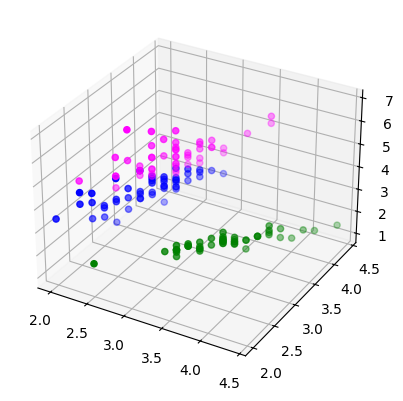

In [11]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

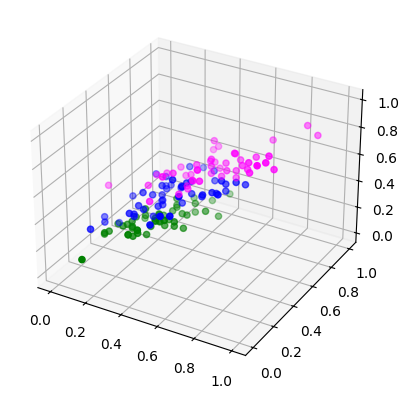

In [19]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import decomposition, preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
Xscaler = MinMaxScaler()
Xpp=Xscaler.fit_transform(X)

# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpp[y==0,0],Xpp[y==0,1],Xpp[y==0,2],color='green')
axes2.scatter3D(Xpp[y==1,0],Xpp[y==1,1],Xpp[y==1,2],color='blue')
axes2.scatter3D(Xpp[y==2,0],Xpp[y==2,1],Xpp[y==2,2],color='magenta')
plt.show

[0.72962445 0.22850762 0.03668922]
[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


<function matplotlib.pyplot.show(close=None, block=None)>

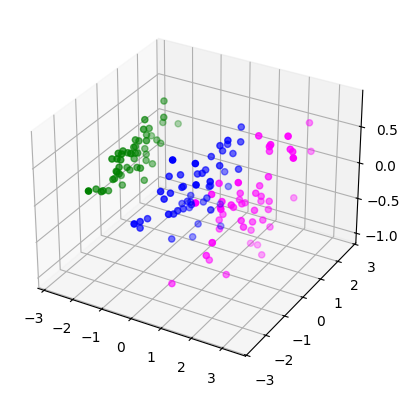

In [ ]:
# Pre-processing is an important step, you can try either StandardScaler (zero mean, unit variance of features)
# or MinMaxScaler (to interval from 0 to 1)
from sklearn import decomposition, preprocessing
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Xpp=Xscaler.fit_transform(X)

# define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
pca.fit(Xpp)
Xpca = pca.transform(Xpp)

print(pca.get_covariance())
# you can plot the transformed feature space in 3D:
axes2=plt.axes(projection='3d')
axes2.scatter3D(Xpca[y==0,0],Xpca[y==0,1],Xpca[y==0,2],color='green')
axes2.scatter3D(Xpca[y==1,0],Xpca[y==1,1],Xpca[y==1,2],color='blue')
axes2.scatter3D(Xpca[y==2,0],Xpca[y==2,1],Xpca[y==2,2],color='magenta')
plt.show


Explained variance: [2.93808505 0.9201649  0.14774182]
Explained variance ratio: [0.72962445 0.22850762 0.03668922]


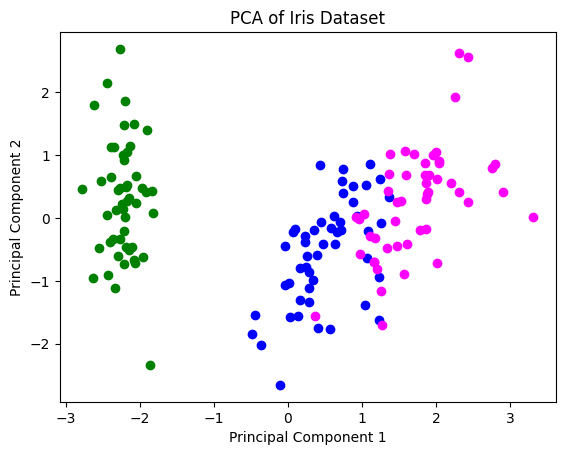

In [22]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_
print("Explained variance:", pca.explained_variance_)
print("Explained variance ratio:", pca.explained_variance_ratio_)

plt.scatter(Xpca[y==0,0],Xpca[y==0,1],color='green')
plt.scatter(Xpca[y==1,0],Xpca[y==1,1],color='blue')
plt.scatter(Xpca[y==2,0],Xpca[y==2,1],color='magenta')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

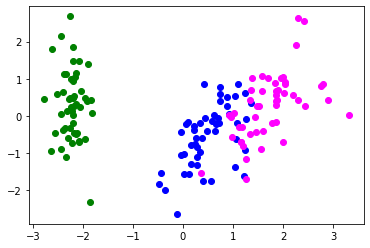

In [ ]:
# Plot the principal components in 2D, mark different targets in color


# KNN classifier

[[13  0  0]
 [ 0 18  1]
 [ 0  0 13]]


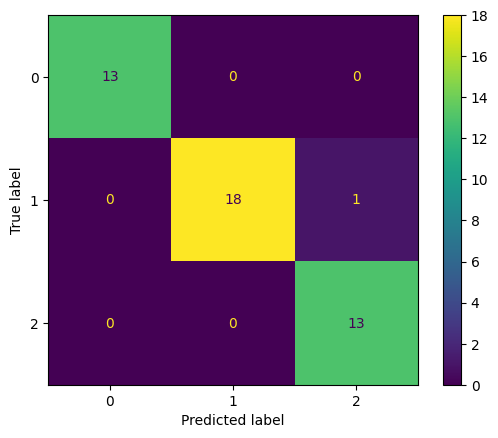

In [ ]:
# Import train_test_split as in last PC lab, split X (original) into train and test, train KNN classifier on full 4-dimensional X
from sklearn.neighbors import KNeighborsClassifier

# Import and show confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 4 features
X_train, X_test, y_train, y_test = train_test_split(Xpp, y, test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



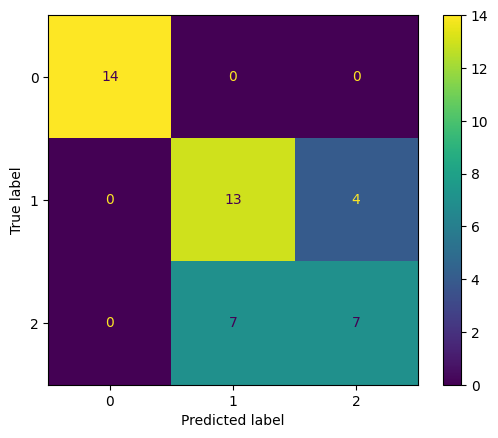

In [ ]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns). 
# Compare the results with full dataset

# define PCA object (three components), fit and transform the data



# xpp, 3 features
from sklearn.decomposition import PCA


X_train, X_test, y_train, y_test = train_test_split(Xpp[:, :3], y, test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
#print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

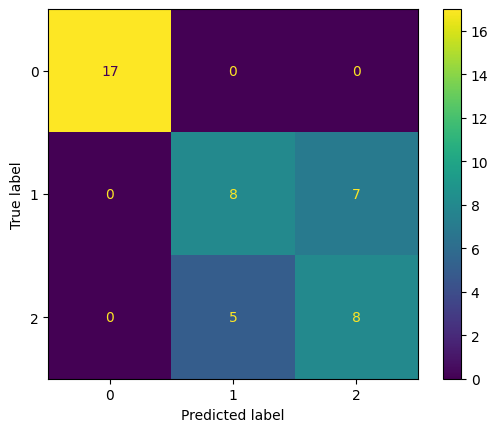

In [65]:
# xpp, 2 features
from sklearn.decomposition import PCA


X_train, X_test, y_train, y_test = train_test_split(Xpp[:, :2], y, test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
#print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

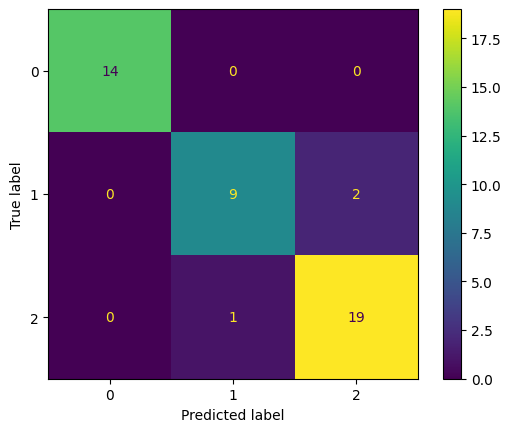

In [68]:
# pca, 3 features
pca = PCA(n_components=3)
X_pca = pca.fit_transform(Xscaler.fit_transform(X))
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
#print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)



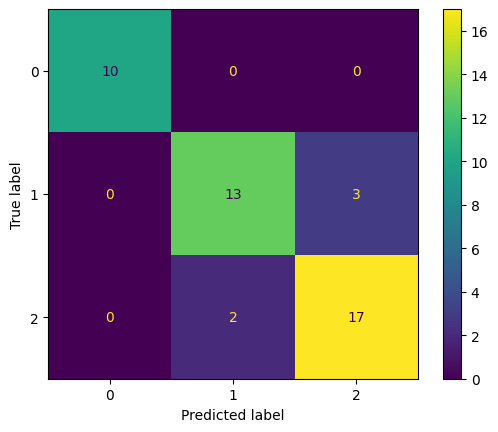

In [ ]:
# pca, 2 features (good is here)
X_train, X_test, y_train, y_test = train_test_split(X_pca[:, :2], y, test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
#print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)

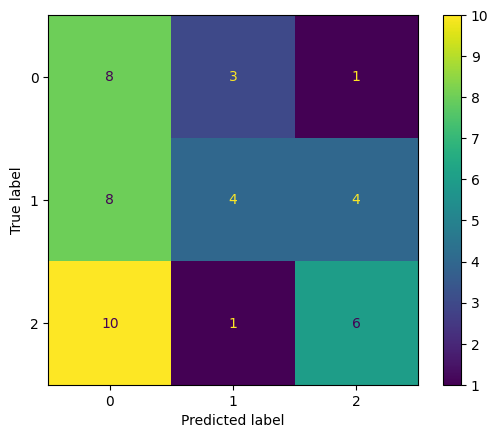

In [70]:
# pca, 2 features (bad is here)
X_train, X_test, y_train, y_test = train_test_split(X_pca[:, 1:3], y, test_size=0.3)

knn1=KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train,y_train)
Ypred=knn1.predict(X_test)
#print(confusion_matrix(y_test,Ypred))
ConfusionMatrixDisplay.from_predictions(y_test,Ypred)